# Introduction:

This Assignment focus on Data Integration and Data reshaping. Where we are given 2 main tasks to work on. In `Task 1` we are provided with sevral datasets in various formats like:
- JSON
- XML
- PDF
- EXCEL
- Shape Files 
- Text Files
Now we have to load all these files into python and convert them to pandas data frame:

In `Task 2` we have to understand the effect of various normalisation/tranformation methods i.e. standardization, MinMax normalisation, log, power box-cox transformation on various columns which are price, Distance_to_sc, travel_min_to_CBD, and Distance_to_hospital and explain the effect. To develop a linear model to predict the price using  Distance_to_sc, travel_min_to_CBD, and Distance_to_hospital.



# TASK 1: Data Integration:

In this task we have 7 files that contains the information regarding the housing in Victoria
Each of these file contains a different data set about housing information in Victoria, Australia. Where in 
- `JSON and XML` file we have the information about the house like `property_id, lat, lng, addr_street, suburb, price, property_type, year, bedrooms, bathrooms and parking_space`. 

- `PDF` Contains the information about the hospitals in victoria `id`,`lat`,`lng`, `name`

- `EXCEL`: Information regards the supermarket in victoria `id`,`lat`,`lng`,`type`

- `Shape File`: Contains the information of suburb and the polygon of lat and log in a suburb area.

- `Text File`: Contains the train route, time , station, distance and various information of PTV in Victoria.

All the distance Calculated are converted into metres

# Importing Libraries:

In [131]:
import json 
import pandas as pd
#!pip install tabula
#!pip install tabula-py
import tabula
from tabula import wrapper
from tabula import read_pdf
import xml.etree.cElementTree as et
#!pip install BeautifulSoup4
import os 
import sys 
import pandas as pd 
from bs4 import BeautifulSoup
from math import sin, cos, sqrt, atan2, radians
#!pip install pyshp
import numpy as np
import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# Reading JSON FILE:
We have read the JSON file and stored it into a variable after that we have converted it to dataframe

In [132]:
# Opening JSON file 
f = open('real_state.json',) 
# returns JSON object as  
# a dictionary 
data = json.load(f) 
# Closing file `
f.close()

real_stateJS = pd.DataFrame(data)

# Reading XML

- Read the XML file 

- Open XML file and remove the unwanted character and Re-write the XML file and re read it again

- parsing over the XML and creating a dictionary for each row and then converted it into a dataframe

In [133]:
f=open('real_state.xml', 'r') 
data1 = f.read()
f.close()
data1=data1[2:]
data1=data1[0:-1]
finalxml = open('real_states.xml', "w",encoding='UTF-8')
finalxml.write(data1)
finalxml.close()



In [134]:
parsed_xml = et.parse("real_states.xml")
xml_dict = {}
# parsing in xml and getting dict for each row
for i in parsed_xml.getroot():
    xml_list = []
    for j in i:
        xml_list.append(j.text)
    xml_dict[i.tag] = xml_list

# converting dictionary to dataframe
real_stateXML = pd.DataFrame(xml_dict)

# Merging JSON and XML:

In this part I have merger the data for JSON and XML as both the files contains data related to the house address and house's.
along with that we have re indexed the index and removed the duplicate rows

In [135]:
# concating both the dataframe to one final dataframe
real_state=pd.concat([real_stateJS,real_stateXML], axis=0,ignore_index=True)

# lat long data type change
real_state[['lat', 'lng']] = real_state[['lat', 'lng']].astype(float)

# property id datatype change
real_state['property_id']=real_state['property_id'].astype(int)

# removing dupllicate
real_state=real_state.drop_duplicates('property_id')
# reseting index
real_state=real_state.reset_index(drop=True)

# Creating required column & setting Default Value

- In this part I have created the required column in the main dataframe 

- Set their default value and converted it into the dataframe 

- Re-arranged the columns based on the assignment specification and created a final structure for the the dataframe

In [136]:
real_state['suburb']='not available'
real_state['Shopping_center_id']='not available'
real_state['Distance_to_sc']=0
real_state['Train_station_id']=0
real_state['Distance_to_train_station']=0
real_state['travel_min_to_CBD']=0
real_state['Transfer_flag']=-1
real_state['Hospital_id']='not available'
real_state['Distance_to_hospital']=0
real_state['Supermarket_id']='not available'
real_state['Distance_to_supermaket']=0
columnsTitles = ['property_id','lat','lng','addr_street','suburb','price','property_type','year','bedrooms',\
                 'bathrooms','parking_space','Shopping_center_id','Distance_to_sc','Train_station_id',\
                 'Distance_to_train_station','travel_min_to_CBD','Transfer_flag','Hospital_id',\
                 'Distance_to_hospital','Supermarket_id','Distance_to_supermaket']

real_state= real_state.reindex(columns=columnsTitles)

# Reading PDF

Reading all the data in the PDF page by page and mearging all the dataframe to one dataframe.


In [137]:
#Convert your file
df1 = tabula.read_pdf("hospitals.pdf",pages=1)
df2 = tabula.read_pdf("hospitals.pdf",pages=2)
df3 = tabula.read_pdf("hospitals.pdf",pages=3)
df4 = tabula.read_pdf("hospitals.pdf",pages=4)
df5 = tabula.read_pdf("hospitals.pdf",pages=5)
hospital=pd.concat([df1,df2,df3,df4,df5],axis=0)
hospital.dropna(subset = ["id"], inplace=True)
hospital=hospital.reset_index()


# Reading HTML

Reading the HTML file into python and converting it into a dataframe

In [138]:
path = 'shopingcenters.html'
# empty list 
data = [] 
# for getting the header from 
# the HTML file 
list_header = [] 
soup = BeautifulSoup(open(path),'html.parser') 
header = soup.find_all("table")[0].find("tr") 
  
for items in header: 
    try: 
        list_header.append(items.get_text()) 
    except: 
        continue

# for getting the dataa  
HTML_data = soup.find_all("table")[0].find_all("tr")[1:] 
  
for element in HTML_data: 
    sub_data = [] 
    for sub_element in element: 
        try: 
            sub_data.append(sub_element.get_text()) 
        except: 
            continue
    data.append(sub_data) 
  

 
# Storing the data into pandas DataFrame  
shoppingCentre = pd.DataFrame(data = data, columns = list_header)

# Reading EXCEL:
reading excel file for the supermarket data and loading it into a dataframe

In [139]:
superMarket=pd.read_excel("supermarkets.xlsx")

# Reading Train Information Text File:

Reading the stop file to find out the nearest staion and station id.

In [140]:
#stops= pd.read_csv("stops.txt", sep = ',')
df_trips=pd.read_csv("trips.txt")
df_stops=pd.read_csv("stops.txt")
df_routes=pd.read_csv("routes.txt")
df_stop_times=pd.read_csv("stop_times.txt")
df_calender=pd.read_csv("calendar.txt")


# Reading shape File

 Reading the shape files for the suburb boundry polygon and fetching the records for suburb and from the list of polygon's

In [141]:
sf = shapefile.Reader("./VIC_LOCALITY_POLYGON_shp") # note, no suffix, all 3 files are used
recs = sf.records()
shapes = sf.shapes()

# Finding suburb's: and Suburb id:

In this part we have looped over the dataframe and find out the each records lat long and stored it then looped over the shape file polygon and found the record for required lat long and append the suburb name for that

In [142]:
# FInding the suburb using the shape file records and shapes we have created a polygon for each shape file list of lat and long 
# Then checking the points i.e. lat and long for property id in that polygon and then checking the record against matched polygon
#index and returning the suburb for that same index in records file
for i in range(len(real_state)):
    pts=Point(real_state.lng[i],real_state.lat[i],)
    for j in range(len(shapes)):
        pointList=shapes[j].points        
        polygon = Polygon(pointList)
        if polygon.contains(pts):
            real_state.at[i,'suburb']=recs[j][6]


In [143]:
# checking if all the values are replaced with the suburb
real_state[real_state['suburb']=='not available']

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


# Finding nearest Shopping Centre and Shopping Centre ID

- Using haversine distance formula we have found out the distance for the nearest `shopping centre` and `shopping id`.

- then looping over the property id fetching lat long for each record and then calculating distance with each shopping centre 

- Finally finding the shopping centre id and shopping centre distance with least distance.




In [144]:
def distance_to_sc(x1,y1,sc_id):
    Radius = 6378.0
    x2 = radians(shoppingCentre['lat'][shoppingCentre['sc_id'] == sc_id])
    y2  =  radians(shoppingCentre['lng'][shoppingCentre['sc_id'] == sc_id])
    dist_long = y2 - y1 
    dist_lat = x2 - x1
    mat = sin(dist_lat / 2)**2 + cos(x1) * cos(x2) * sin(dist_long / 2)**2 
    mat1 = 2 * atan2(sqrt(mat), sqrt(1 - mat))
    distance = Radius * mat1
    return distance, sc_id


In [145]:
# Iterating over dataframe and finding the nearest Shopping Centre and  
# and appending the distance from the property along with Shopping centre id to each record
for i in range(len(real_state['property_id'])):
    final_list = []
    dis_list = []
    name_list = []
    for j in shoppingCentre['sc_id']:
        dis,name = distance_to_sc(radians(real_state.lat[i])\
                            ,radians(real_state.lng[i]),j)
        dis_list.append(dis)
        name_list.append(name)
    final_list = list(zip(dis_list,name_list))
    final_dis,final_name = min(final_list)[0],min(final_list)[1]
    real_state.at[i,'Distance_to_sc'] = (round(final_dis,4)*1000)
    real_state.at[i,'Shopping_center_id'] = final_name

In [146]:
# checking if all the values are replaced with the Shopping Centre id 
#shopping centre distance is calculated
real_state[real_state['Shopping_center_id']=='not available']

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


In [147]:
real_state[real_state['Distance_to_sc']==0]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


# Finding nearest Train station

Using haversine distance we have created a function to calculate the distance to the nearest train station with each record in the dataframe

In [148]:
# Function to calculate the distance
def distance_to_station(x1,y1,stop_id):
    Radius = 6378.0
    x2 = radians(df_stops['stop_lat'][df_stops['stop_id'] == stop_id])
    y2  =  radians(df_stops['stop_lon'][df_stops['stop_id'] == stop_id])
    dist_long = y2 - y1 
    dist_lat = x2 - x1
    mat = sin(dist_lat / 2)**2 + cos(x1) * cos(x2) * sin(dist_long / 2)**2 
    mat1 = 2 * atan2(sqrt(mat), sqrt(1 - mat))
    distance = Radius * mat1
    return distance, stop_id


In [149]:
# Iterating over dataframe and finding the nearest station 
# and appending the distance from the property along with station id to each record
for i in range(len(real_state['property_id'])):
    final_list = []
    dis_list = []
    name_list = []
    for j in df_stops['stop_id']:
        dis,name = distance_to_station(radians(real_state.lat[i])\
                            ,radians(real_state.lng[i]),j)
        dis_list.append(dis)
        name_list.append(name)
    final_list = list(zip(dis_list,name_list))
    final_dis,final_name = min(final_list)[0],min(final_list)[1]
    real_state.at[i,'Distance_to_train_station'] = (round(final_dis,4)*1000)
    real_state.at[i,'Train_station_id'] = final_name

In [150]:
# checking if all the values are replaced with the Station ID 
# distance to station is calculated
real_state[real_state['Train_station_id']==0]


,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


In [151]:
real_state[real_state['Distance_to_train_station']==0]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


# Minimum Average Travel Time to CBD and Transfer Flag

- In this part we have to calculate the average travel time to CBD i.e Flinder Street Station from each property record using the nearest train Station for weekdays i.e. Monday to Friday where the trains departures between 7AM-9AM. if there are 3 trip
- If there are any direct transfers between the closest station and Flinders street station, only the average of direct transfers should be calculated.

- We have created a column that holds a Boolean value which indicate's whether there is a direct trip to the Flinders street station from the closest station between 7-9am on the weekdays

- It is set to 0 if there is a direct trip i.e. no transfer between trains is required to get from the closest train station to the Flinders station

- And it is set to 1 when 1 there is transfer between trains is required to get from the closest station to flinders streen between 7-9AM on week day 

- Default value remains -1

In [152]:
import pandas as pd
from datetime import datetime
df_combined=df_trips.join(df_routes.set_index('route_id'), on='route_id')\
            .join(df_stop_times.set_index('trip_id'), on='trip_id')\
            .join(df_calender.set_index('service_id'), on='service_id')


start = datetime.strptime('07:00:00','%H:%M:%S')
end=  datetime.strptime('11:00:00','%H:%M:%S')
df_combined=df_combined[(df_combined["monday"]==1) & (df_combined["tuesday"]==1)& (df_combined["wednesday"]==1)\
                        & (df_combined["thursday"]==1) & (df_combined["friday"]==1) \
                        &(df_combined['trip_headsign']=='City (Flinders Street)')]

In [153]:
acceptedStart = datetime.strptime('07:00:00','%H:%M:%S')
acceptedEnd=  datetime.strptime('09:00:00','%H:%M:%S')
lst_trip=df_combined.trip_id.unique()


for index, row in df_combined.iterrows():
    try:  
        at=datetime.strptime(row['arrival_time'],'%H:%M:%S')
        if((at>=acceptedStart )& (at<=acceptedEnd)):
            pass
        else:
            df_combined.drop(index, inplace=True)
        
    except:    
        pass

In [154]:
len(df_combined)

2473

In [155]:

def Average(lst): 
    if(len(lst)==0):
        return 0
    else:
        return sum(lst) / len(lst) 


def findAverage(startStopid,endStopId):
    averageTime=[]
    flag=1
    if(endStopId==startStopid==19854):
        return (0,0)
    for eachTrip in lst_trip:
        trip=df_combined[df_combined["trip_id"]==eachTrip]
        stops=trip["stop_id"].tolist()
       
        if((startStopid in stops ) & (endStopId in stops)):
            index_start=stops.index(startStopid)
            index_end=stops.index(endStopId)
            if(index_start<index_end):
                try:    
                    time_dpt_start=datetime.strptime(trip[trip["stop_id"]==startStopid].iloc[0][11],'%H:%M:%S')
                    time_arrv_end= datetime.strptime(trip[trip["stop_id"]==endStopId].iloc[0][10],'%H:%M:%S')
               
                    if((time_dpt_start>=acceptedStart) & (time_dpt_start <=acceptedEnd)):
                        difference= time_arrv_end-time_dpt_start
                   
                        averageTime.append(difference.total_seconds()/60)
                        flag=0
                except:
                    pass
                
    return (int(Average(averageTime)),flag)            
            
                


In [156]:
real_state.head

<bound method NDFrame.head of       property_id        lat         lng           addr_street       suburb  \
0           69277 -37.864490  145.037905  7 Lysterville Avenue      MALVERN   
1           72336 -37.847437  145.262319       36 Orange Grove    BAYSWATER   
2            8706 -37.749222  144.781403       9 Moorland Road     CAIRNLEA   
3           39914 -37.702119  145.059471     19A Doidge Street     BUNDOORA   
4           89255 -37.957590  145.008680        168 Beach Road  SANDRINGHAM   
...           ...        ...         ...                   ...          ...   
1971        50542 -37.754402  145.122406      3/51 Wood Street  TEMPLESTOWE   
1972        64524 -37.774910  145.295069       45a Dorset Road      CROYDON   
1973        32064 -37.750720  144.987141     178 Miller Street      PRESTON   
1974        13334 -37.713759  144.776636           6 Ryan Road      DELAHEY   
1975        53289 -37.829561  145.010328      42 Gibdon Street      BURNLEY   

         price proper

In [157]:
#print(real_state.columns)
for i in range(len(real_state['property_id'])):
    res=findAverage( real_state.Train_station_id[i],flinders)
    real_state.travel_min_to_CBD[i]=res[0]
    real_state.Transfer_flag[i]=res[1]
    print(res[0])
    print(res[1])
    



C:\Users\Shranja Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Shranja Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


18
0
50
0
33
0
34
0
29
0
23
0
36
0
41
0
30
0
46
0
25
0
30
0
30
0
51
0
45
0
38
0
19
0
45
0
39
0
35
0
29
0
20
0
15
0
43
0
34
0
38
0
51
0
36
0
30
0
18
0
32
0
19
0
29
0
11
0
33
0
10
0
35
0
27
0
45
0
34
0
54
0
23
0
54
0
40
0
25
0
44
0
40
0
36
0
23
0
6
0
46
0
40
0
43
0
55
0
36
0
28
0
37
0
40
0
22
0
33
0
34
0
25
0
40
0
35
0
32
0
31
0
34
0
54
0
32
0
14
0
52
0
43
0
36
0
61
0
33
0
51
0
28
0
28
0
18
0
13
0
29
0
44
0
47
0
46
0
34
0
54
0
20
0
15
0
36
0
22
0
20
0
17
0
14
0
20
0
46
0
49
0
19
0
45
0
19
0
35
0
41
0
39
0
40
0
15
0
41
0
22
0
44
0
38
0
35
0
23
0
27
0
59
0
55
0
28
0
30
0
32
0
12
0
23
0
54
0
29
0
28
0
20
0
30
0
44
0
46
0
45
0
25
0
20
0
38
0
35
0
44
0
19
0
51
0
34
0
18
0
46
0
43
0
39
0
20
0
23
0
46
0
46
0
33
0
23
0
33
0
35
0
28
0
36
0
36
0
23
0
9
0
30
0
40
0
6
0
38
0
40
0
40
0
23
0
23
0
61
0
44
0
28
0
30
0
54
0
39
0
55
0
39
0
59
0
26
0
49
0
39
0
11
0
34
0
35
0
20
0
34
0
25
0
28
0
19
0
36
0
23
0
16
0
39
0
39
0
28
0
40
0
32
0
33
0
32
0
20
0
34
0
41
0
27
0
27
0
54
0
40
0
10
0
23
0
32
0
30
0
20


15
0
55
0
54
0
25
0
44
0
29
0
16
0
40
0
46
0
21
0
33
0
23
0
32
0
29
0
23
0
18
0
54
0
32
0
40
0
36
0
40
0
42
0
36
0
55
0
46
0
39
0
28
0
39
0
50
0
30
0
36
0
45
0
30
0
39
0
10
0
19
0
61
0
36
0
33
0
34
0
28
0
43
0
39
0
30
0
50
0
41
0
47
0
15
0
20
0
36
0
39
0
35
0
55
0
61
0
34
0
34
0
19
0
46
0
40
0
44
0
24
0
29
0
39
0
55
0
13
0
40
0
27
0
40
0
37
0
34
0
44
0
32
0
20
0
40
0
44
0
23
0
32
0
55
0
34
0
46
0
34
0
25
0
34
0
14
0
36
0
61
0
9
0
10
0
54
0
23
0
15
0
23
0
25
0
55
0
23
0
41
0
34
0
30
0
20
0
44
0
30
0
34
0
32
0
29
0
49
0
32
0
41
0
53
0
45
0
17
0
55
0
36
0
61
0
29
0
26
0
29
0
28
0
39
0
40
0
38
0
46
0
46
0
36
0
17
0
19
0
53
0
37
0
45
0
40
0
7
0
36
0
23
0
38
0
20
0
26
0
29
0
53
0
44
0
40
0
22
0
29
0
15
0
51
0
39
0
35
0
26
0
21
0
53
0
8
0
44
0
31
0
28
0
34
0
40
0
29
0
51
0
11
0
34
0
59
0
29
0
19
0
25
0
43
0
13
0
51
0
29
0
38
0
30
0
45
0
25
0
55
0
20
0
40
0
39
0
29
0
20
0
21
0
20
0
35
0
34
0
37
0
45
0
45
0
40
0
39
0
42
0
27
0
8
0
32
0
35
0
47
0
46
0
44
0
37
0
51
0
29
0
40
0
36
0
25
0
38
0
11
0

In [158]:
real_state

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,69277,-37.864490,145.037905,7 Lysterville Avenue,MALVERN,4260000,house,2016,3,2,...,SC_023,1374,19944,781,18,0,not available,0,not available,0
1,72336,-37.847437,145.262319,36 Orange Grove,BAYSWATER,7000000,house,2010,2,1,...,SC_032,4856,19870,815,50,0,not available,0,not available,0
2,8706,-37.749222,144.781403,9 Moorland Road,CAIRNLEA,5040000,house,2009,4,2,...,SC_107,3345,20002,1711,33,0,not available,0,not available,0
3,39914,-37.702119,145.059471,19A Doidge Street,BUNDOORA,7232000,house,2014,3,1,...,SC_047,4799,19984,2357,34,0,not available,0,not available,0
4,89255,-37.957590,145.008680,168 Beach Road,SANDRINGHAM,17500000,house,2013,4,3,...,SC_079,2995,19948,885,29,0,not available,0,not available,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,50542,-37.754402,145.122406,3/51 Wood Street,TEMPLESTOWE,4040000,house,2008,3,2,...,SC_009,2961,19986,4353,40,0,not available,0,not available,0
1972,64524,-37.774910,145.295069,45a Dorset Road,CROYDON,8840000,house,2014,3,2,...,SC_084,2497,19877,1877,55,0,not available,0,not available,0
1973,32064,-37.750720,144.987141,178 Miller Street,PRESTON,20800000,house,2016,4,2,...,SC_103,1798,20014,1115,23,0,not available,0,not available,0
1974,13334,-37.713759,144.776636,6 Ryan Road,DELAHEY,3042000,house,2011,3,1,...,SC_107,3099,20000,1422,39,0,not available,0,not available,0


# Finding Distance to Hospital and the hospital id

Using haversine distance we have created a function to calculate the distance to the nearest hospital with each record in the dataframe

In [159]:
def distance_to_hospital(x1,y1,id1):
    Radius = 6378.0
    x2 = radians(hospital['lat'][hospital['id'] == id1])
    y2  =  radians(hospital['lng'][hospital['id'] == id1])
    dist_long = y2 - y1 
    dist_lat = x2 - x1
    mat = sin(dist_lat / 2)**2 + cos(x1) * cos(x2) * sin(dist_long / 2)**2 
    mat1 = 2 * atan2(sqrt(mat), sqrt(1 - mat))
    distance = Radius * mat1
    return distance, id1

In [160]:
# Iterating over dataframe and finding the nearest Hospital and  
# and appending the distance from the property along with Hospital id to each record


for i in range(len(real_state['property_id'])):
    final_list = []
    dis_list = []
    name_list = []
    for j in hospital['id']:

        dis,name = distance_to_hospital(radians(real_state.lat[i])\
                            ,radians(real_state.lng[i]),j)
    
        dis_list.append(dis)
        name_list.append(name)
    final_list = list(zip(dis_list,name_list))
    final_dis,final_name = min(final_list)[0],min(final_list)[1]
    real_state.at[i,'Distance_to_hospital'] = (round(final_dis,4)*1000)
    real_state.at[i,'Hospital_id'] = final_name

In [161]:
# checking if all the values are replaced with the Hospital id 
#and distance to hospital is calculated
real_state[real_state['Hospital_id']=='not available']


,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


In [162]:
real_state[real_state['Distance_to_hospital']==0]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


# Finding Distance to Super Market and SuperMarket ID

Using haversine distance we have created a function to calculate the distance to the nearest super market with each record in the dataframe

In [163]:
def distance_to_supermarket(x1,y1,id):
    Radius = 6378.0
    x2 = radians(superMarket['lat'][superMarket['id'] == id])
    y2  =  radians(superMarket['lng'][superMarket['id'] == id])
    dist_long = y2 - y1 
    dist_lat = x2 - x1
    mat = sin(dist_lat / 2)**2 + cos(x1) * cos(x2) * sin(dist_long / 2)**2 
    mat1 = 2 * atan2(sqrt(mat), sqrt(1 - mat))
    distance = Radius * mat1
    return distance, id


In [164]:
# Iterating over dataframe and finding the nearest SuperMarket and  
# and appending the distance from the property along with Supermarket ID to each record

for i in range(len(real_state['property_id'])):
    final_list = []
    dis_list = []
    name_list = []
    for j in superMarket['id']:
        dis,name = distance_to_supermarket(radians(real_state.lat[i])\
                            ,radians(real_state.lng[i]),j)
        dis_list.append(dis)
        name_list.append(name)
    final_list = list(zip(dis_list,name_list))
    final_dis,final_name = min(final_list)[0],min(final_list)[1]
    real_state.at[i,'Distance_to_supermaket'] = (round(final_dis,4)*1000)
    real_state.at[i,'Supermarket_id'] = final_name

In [165]:
# checking if all the values are replaced with the Super Market ID
#and distance to superMarket is calculated
real_state[real_state['Supermarket_id']=='not available']

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


In [166]:
real_state[real_state['Distance_to_supermaket']==0]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket


In [167]:
real_state

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,69277,-37.864490,145.037905,7 Lysterville Avenue,MALVERN,4260000,house,2016,3,2,...,SC_023,1374,19944,781,18,0,hospital_183,160,S_235,923
1,72336,-37.847437,145.262319,36 Orange Grove,BAYSWATER,7000000,house,2010,2,1,...,SC_032,4856,19870,815,50,0,hospital_002,1032,S_139,639
2,8706,-37.749222,144.781403,9 Moorland Road,CAIRNLEA,5040000,house,2009,4,2,...,SC_107,3345,20002,1711,33,0,hospital_057,3171,S_152,618
3,39914,-37.702119,145.059471,19A Doidge Street,BUNDOORA,7232000,house,2014,3,1,...,SC_047,4799,19984,2357,34,0,hospital_037,196,S_155,556
4,89255,-37.957590,145.008680,168 Beach Road,SANDRINGHAM,17500000,house,2013,4,3,...,SC_079,2995,19948,885,29,0,hospital_058,993,S_214,1797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,50542,-37.754402,145.122406,3/51 Wood Street,TEMPLESTOWE,4040000,house,2008,3,2,...,SC_009,2961,19986,4353,40,0,hospital_193,2180,S_046,2258
1972,64524,-37.774910,145.295069,45a Dorset Road,CROYDON,8840000,house,2014,3,2,...,SC_084,2497,19877,1877,55,0,hospital_164,5043,S_058,2515
1973,32064,-37.750720,144.987141,178 Miller Street,PRESTON,20800000,house,2016,4,2,...,SC_103,1798,20014,1115,23,0,hospital_144,1494,S_105,1451
1974,13334,-37.713759,144.776636,6 Ryan Road,DELAHEY,3042000,house,2011,3,1,...,SC_107,3099,20000,1422,39,0,hospital_057,6178,S_094,1275


# Writing the Final Dataframe to CSV FILE:

In [228]:
real_state.to_csv('30823293_A3_solution.csv',index=False)

# TASK 2: Data Reshaping

In this task we have to understand the effect of various normalisation/tranformation methods i.e. standardization, MinMax normalisation, log, power box-cox transformation on various columns which are price, Distance_to_sc, travel_min_to_CBD, and Distance_to_hospital and explain the effect. To develop a linear model to predict the price using  Distance_to_sc, travel_min_to_CBD, and Distance_to_hospital. For this we have done. 

In [199]:
new_real_state=real_state[["price","Distance_to_sc","travel_min_to_CBD","Distance_to_hospital"]]
new_real_state['price']=new_real_state['price'].astype(float)

C:\Users\Shranja Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Plot Description of all column:

As we can see that the plot for Price and Distance to Hospital is a Skewed and both are Right Skewed this is because the main given data is skewed and some of the values are concentrated towards Right

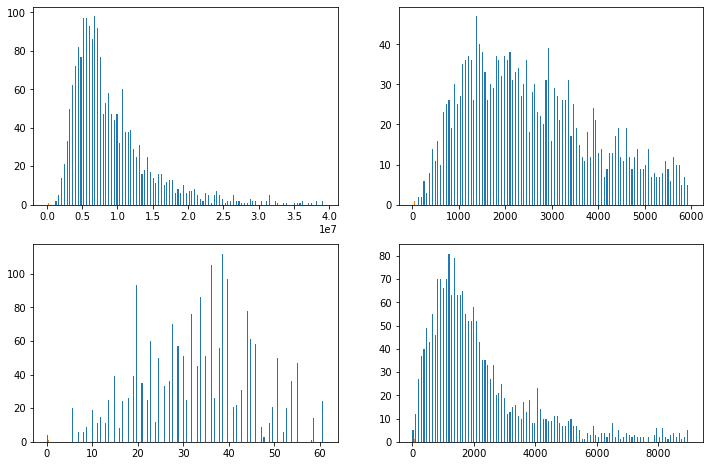

In [227]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist((new_real_state['price'],0.5),bins=100)
ax2.hist((new_real_state['Distance_to_sc'],0.5),bins=100)
ax3.hist((new_real_state['travel_min_to_CBD'],0.5),bins=100)
ax4.hist((new_real_state['Distance_to_hospital'],0.5),bins=100)
plt.show()

# Transformation: 

I have used log transformation in `price` column and root transformation in `Distance_to_sc` and `Distance_to_hospital` to normalize the data in these columns

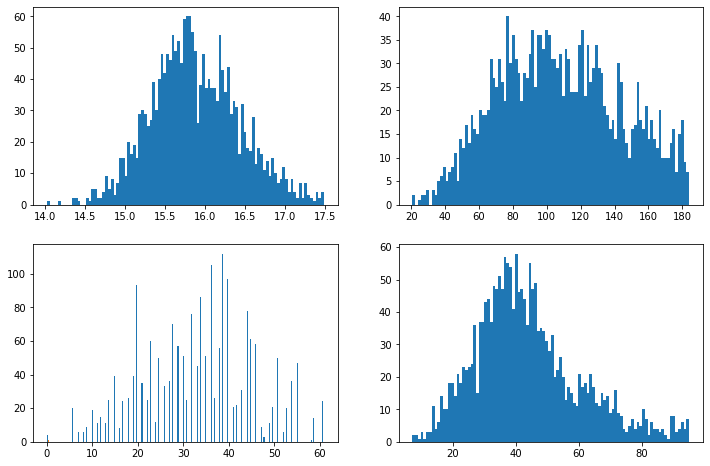

In [220]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)





ax1.hist(np.log(new_real_state['price']+1),bins=100)
ax2.hist(np.power(new_real_state['Distance_to_sc'],0.6),bins=100)
ax3.hist((new_real_state['travel_min_to_CBD'],0.5),bins=100)
ax4.hist(np.power(new_real_state['Distance_to_hospital'],0.5),bins=100)
plt.show()

In [222]:
Transformed_real_state=new_real_state.copy()

Transformed_real_state['price']=(np.log(new_real_state['price']+1))
Transformed_real_state['Distance_to_hospital']=(np.power(new_real_state['Distance_to_hospital'],0.5))
Transformed_real_state['Distance_to_sc']=(np.power(new_real_state['Distance_to_hospital'],0.5))
Transformed_real_state

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
0,15.264780,12.649111,18,12.649111
1,15.761421,32.124757,50,32.124757
2,15.432917,56.311633,33,56.311633
3,15.794026,14.000000,34,14.000000
4,16.677711,31.511903,29,31.511903
...,...,...,...,...
1971,15.211755,46.690470,40,46.690470
1972,15.994798,71.014083,55,71.014083
1973,16.850464,38.652296,23,38.652296
1974,14.928026,78.600254,39,78.600254


# Plotting Scatter Plot:
In this part I have plotted a scatter plot to display the linearty

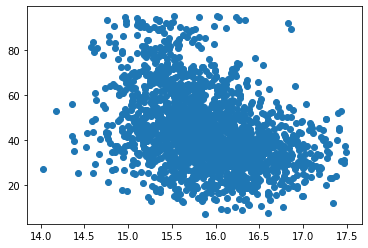

In [223]:
plt.scatter(Transformed_real_state.price,Transformed_real_state.Distance_to_hospital)
plt.show()

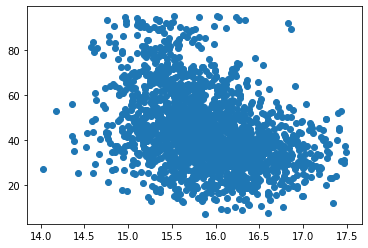

In [224]:
plt.scatter(Transformed_real_state.price,Transformed_real_state.Distance_to_sc)
plt.show()

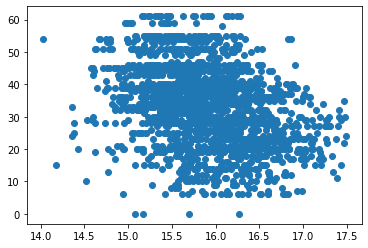

In [225]:
plt.scatter(Transformed_real_state.price,Transformed_real_state.travel_min_to_CBD)
plt.show()

## References:

[1] https://www.geeksforgeeks.org/convert-html-table-into-csv-file-in-python/

[2] https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

[3] https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

[4] https://stackoverflow.com/questions/28259301/how-to-convert-an-xml-file-to-nice-pandas-dataframe